## Feature Engineering

In [1]:
#import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#load the data
df = pd.read_csv('clean_retail_data.csv')
df.head()

,Unnamed: 0,customer_id,order_date,product_id,category_id,category_name,product_name,quantity,price,payment_method,city,review_score,gender,age
0,0,13542,2024-12-17,784,10,Electronics,Smartphone,2,373.36,Credit Card,New Oliviaberg,1.0,F,56
1,1,23188,2024-06-01,682,50,Sports & Outdoors,Soccer Ball,5,299.34,Credit Card,Port Matthew,4.0,M,59
2,2,55098,2025-02-04,684,50,Sports & Outdoors,Tent,5,23.00,Credit Card,West Sarah,5.0,F,64
3,3,65208,2024-10-28,204,40,Books & Stationery,Story Book,2,230.11,Bank Transfer,Hernandezburgh,5.0,M,34
4,4,63872,2024-05-10,202,20,Fashion,Skirt,4,176.72,Credit Card,Jenkinshaven,1.0,F,33


In [3]:
# select necessary columns from data 
df = df[['category_id', 'quantity', 'price', 'payment_method', 'gender', 'age']]
df.head()

,category_id,quantity,price,payment_method,gender,age
0,10,2,373.36,Credit Card,F,56
1,50,5,299.34,Credit Card,M,59
2,50,5,23.00,Credit Card,F,64
3,40,2,230.11,Bank Transfer,M,34
4,20,4,176.72,Credit Card,F,33


In [4]:
# create new column total_amount 
df['total_amount'] = df['quantity']*df['price']
df.head()

,category_id,quantity,price,payment_method,gender,age,total_amount
0,10,2,373.36,Credit Card,F,56,746.72
1,50,5,299.34,Credit Card,M,59,1496.70
2,50,5,23.00,Credit Card,F,64,115.00
3,40,2,230.11,Bank Transfer,M,34,460.22
4,20,4,176.72,Credit Card,F,33,706.88


In [5]:
# drop columns
df = df.drop(columns=['quantity', 'price'])
df.head()

,category_id,payment_method,gender,age,total_amount
0,10,Credit Card,F,56,746.72
1,50,Credit Card,M,59,1496.70
2,50,Credit Card,F,64,115.00
3,40,Bank Transfer,M,34,460.22
4,20,Credit Card,F,33,706.88


In [26]:
# unique values in payment method
list(df['payment_method'].unique())

['Credit Card', 'Bank Transfer', 'Cash on Delivery']

In [6]:
# convert payment method into numeric column
df['payment_method'] = df['payment_method'].replace(['Credit Card', 'Bank Transfer', 'Cash on Delivery'], [0, 1, 2])
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13872\4014325402.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['payment_method'] = df['payment_method'].replace(['Credit Card', 'Bank Transfer', 'Cash on Delivery'], [0, 1, 2])


,category_id,payment_method,gender,age,total_amount
0,10,0,F,56,746.72
1,50,0,M,59,1496.70
2,50,0,F,64,115.00
3,40,1,M,34,460.22
4,20,0,F,33,706.88


In [7]:
#convert gender into numeric column
df['gender'] = df['gender'].replace(['F', 'M'], [0, 1])
df.head()

C:\Users\Dell\AppData\Local\Temp\ipykernel_13872\3480476632.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace(['F', 'M'], [0, 1])


,category_id,payment_method,gender,age,total_amount
0,10,0,0,56,746.72
1,50,0,1,59,1496.70
2,50,0,0,64,115.00
3,40,1,1,34,460.22
4,20,0,0,33,706.88


In [32]:
# check the datatypes
df.dtypes

category_id         int64
payment_method      int64
gender              int64
age                 int64
total_amount      float64
dtype: object

In [8]:
#normalization of data 
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(df)
x

array([[-1.37955241, -1.312328  , -1.01913511,  0.56828567,  0.00815804],
       [ 1.40751631, -1.312328  ,  0.98122417,  0.74936995,  1.32743127],
       [ 1.40751631, -1.312328  , -1.01913511,  1.05117708, -1.10308664],
       ...,
       [-1.37955241, -0.08612153,  0.98122417,  0.14575569,  1.81381631],
       [-1.37955241,  1.14008495,  0.98122417,  1.47370707,  0.25344386],
       [ 0.71074913,  1.14008495,  0.98122417, -0.75966571, -0.26592388]])

In [34]:
x.shape

(897, 5)

## Model Building

In [ ]:
#finding no. of cluster for kmean cluster model using elbow method 
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

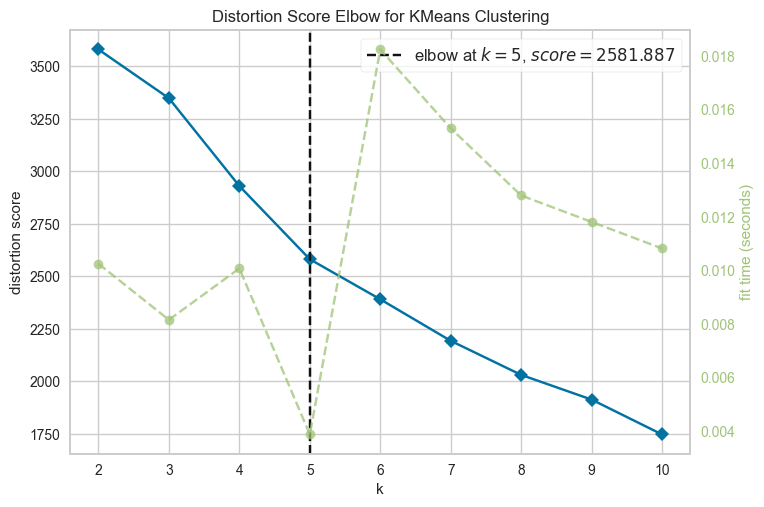

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [83]:
model = KMeans()
em = KElbowVisualizer(model, k=10)
em.fit(x)
em.show()

In [84]:
#creat and fit model 
cm = KMeans(init= "k-means++", n_clusters= 5, n_init=10)
cm.fit(x)

KMeans(n_clusters=5, n_init=10)

In [85]:
#predict labels 
labels = cm.labels_
labels

array([3, 0, 2, 4, 3, 3, 1, 2, 0, 3, 4, 4, 4, 1, 1, 3, 1, 1, 3, 0, 1, 4,
       1, 4, 4, 1, 1, 1, 0, 4, 3, 4, 4, 3, 0, 1, 2, 1, 1, 2, 3, 1, 3, 2,
       2, 1, 2, 4, 1, 1, 1, 1, 4, 3, 2, 2, 4, 4, 2, 0, 4, 4, 1, 2, 3, 4,
       4, 0, 1, 4, 0, 1, 1, 1, 0, 2, 1, 2, 1, 0, 1, 2, 4, 1, 0, 1, 2, 3,
       0, 0, 3, 3, 3, 1, 1, 3, 1, 0, 3, 2, 1, 1, 3, 3, 4, 1, 3, 1, 4, 1,
       2, 0, 0, 4, 1, 2, 2, 3, 1, 4, 0, 1, 0, 4, 2, 2, 1, 2, 0, 0, 3, 3,
       3, 2, 2, 3, 0, 4, 4, 3, 0, 2, 2, 4, 3, 1, 3, 0, 1, 1, 1, 4, 0, 0,
       0, 4, 1, 4, 3, 3, 4, 3, 1, 1, 2, 4, 1, 2, 4, 4, 1, 2, 0, 4, 2, 2,
       2, 0, 3, 2, 4, 2, 2, 0, 4, 1, 4, 2, 3, 2, 4, 1, 0, 3, 3, 1, 4, 2,
       3, 1, 2, 4, 3, 2, 4, 1, 1, 3, 0, 2, 2, 3, 3, 0, 2, 2, 2, 4, 4, 4,
       0, 4, 2, 2, 4, 1, 4, 2, 4, 2, 3, 4, 3, 2, 4, 4, 3, 4, 4, 4, 1, 4,
       0, 0, 1, 4, 1, 2, 1, 3, 0, 4, 0, 4, 4, 4, 4, 0, 1, 1, 4, 3, 3, 1,
       4, 4, 1, 0, 0, 4, 2, 2, 4, 2, 2, 1, 1, 3, 4, 1, 1, 3, 1, 4, 2, 2,
       2, 1, 2, 4, 3, 1, 2, 4, 3, 3, 2, 2, 4, 0, 0,

In [86]:
#assign labels to data
df['label'] = labels 
df.head()

,category_id,payment_method,gender,age,total_amount,label
0,10,0,0,56,746.72,3
1,50,0,1,59,1496.70,0
2,50,0,0,64,115.00,2
3,40,1,1,34,460.22,4
4,20,0,0,33,706.88,3


(0.0, 3500.0)

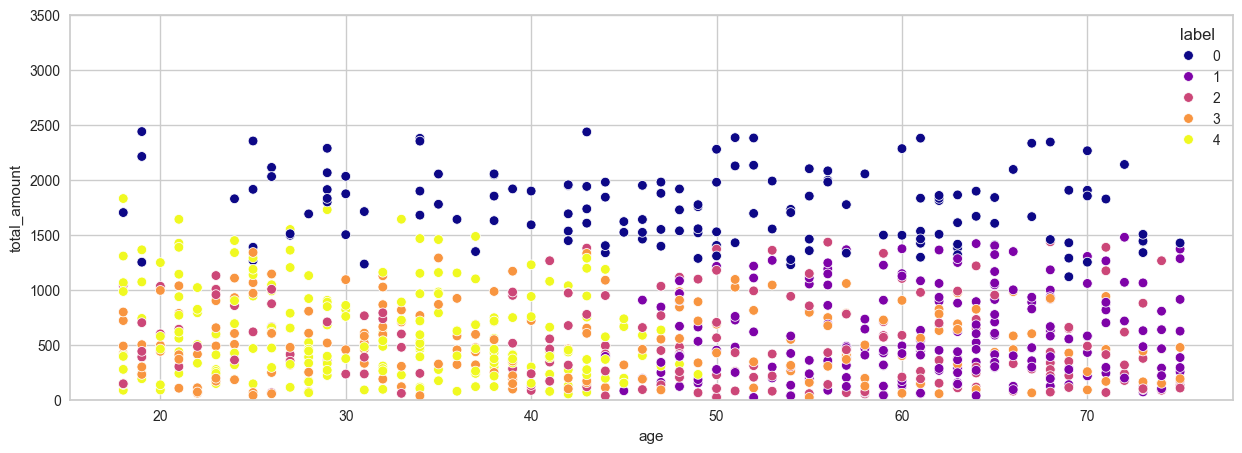

In [87]:
# identify clusters
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='age', y='total_amount', hue='label', palette='plasma')
plt.ylim(0, 3500)

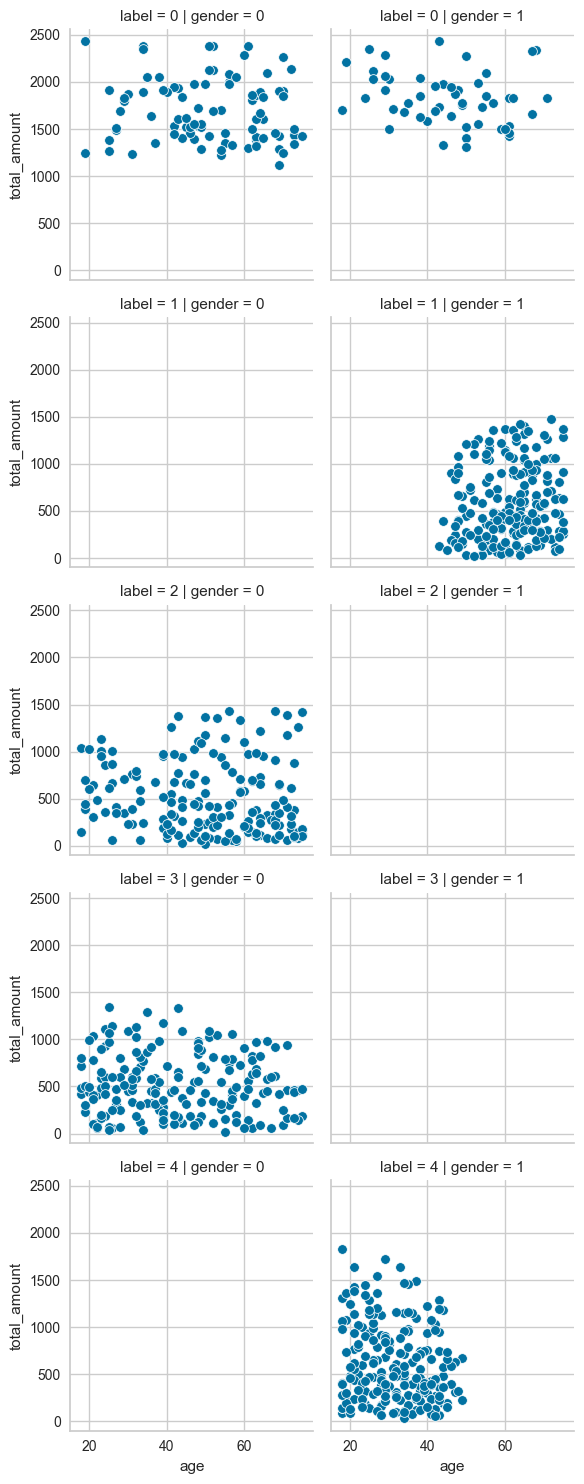

In [90]:
g = sns.FacetGrid(df, col="gender", row='label')
g.map_dataframe(sns.scatterplot, x="age", y="total_amount")

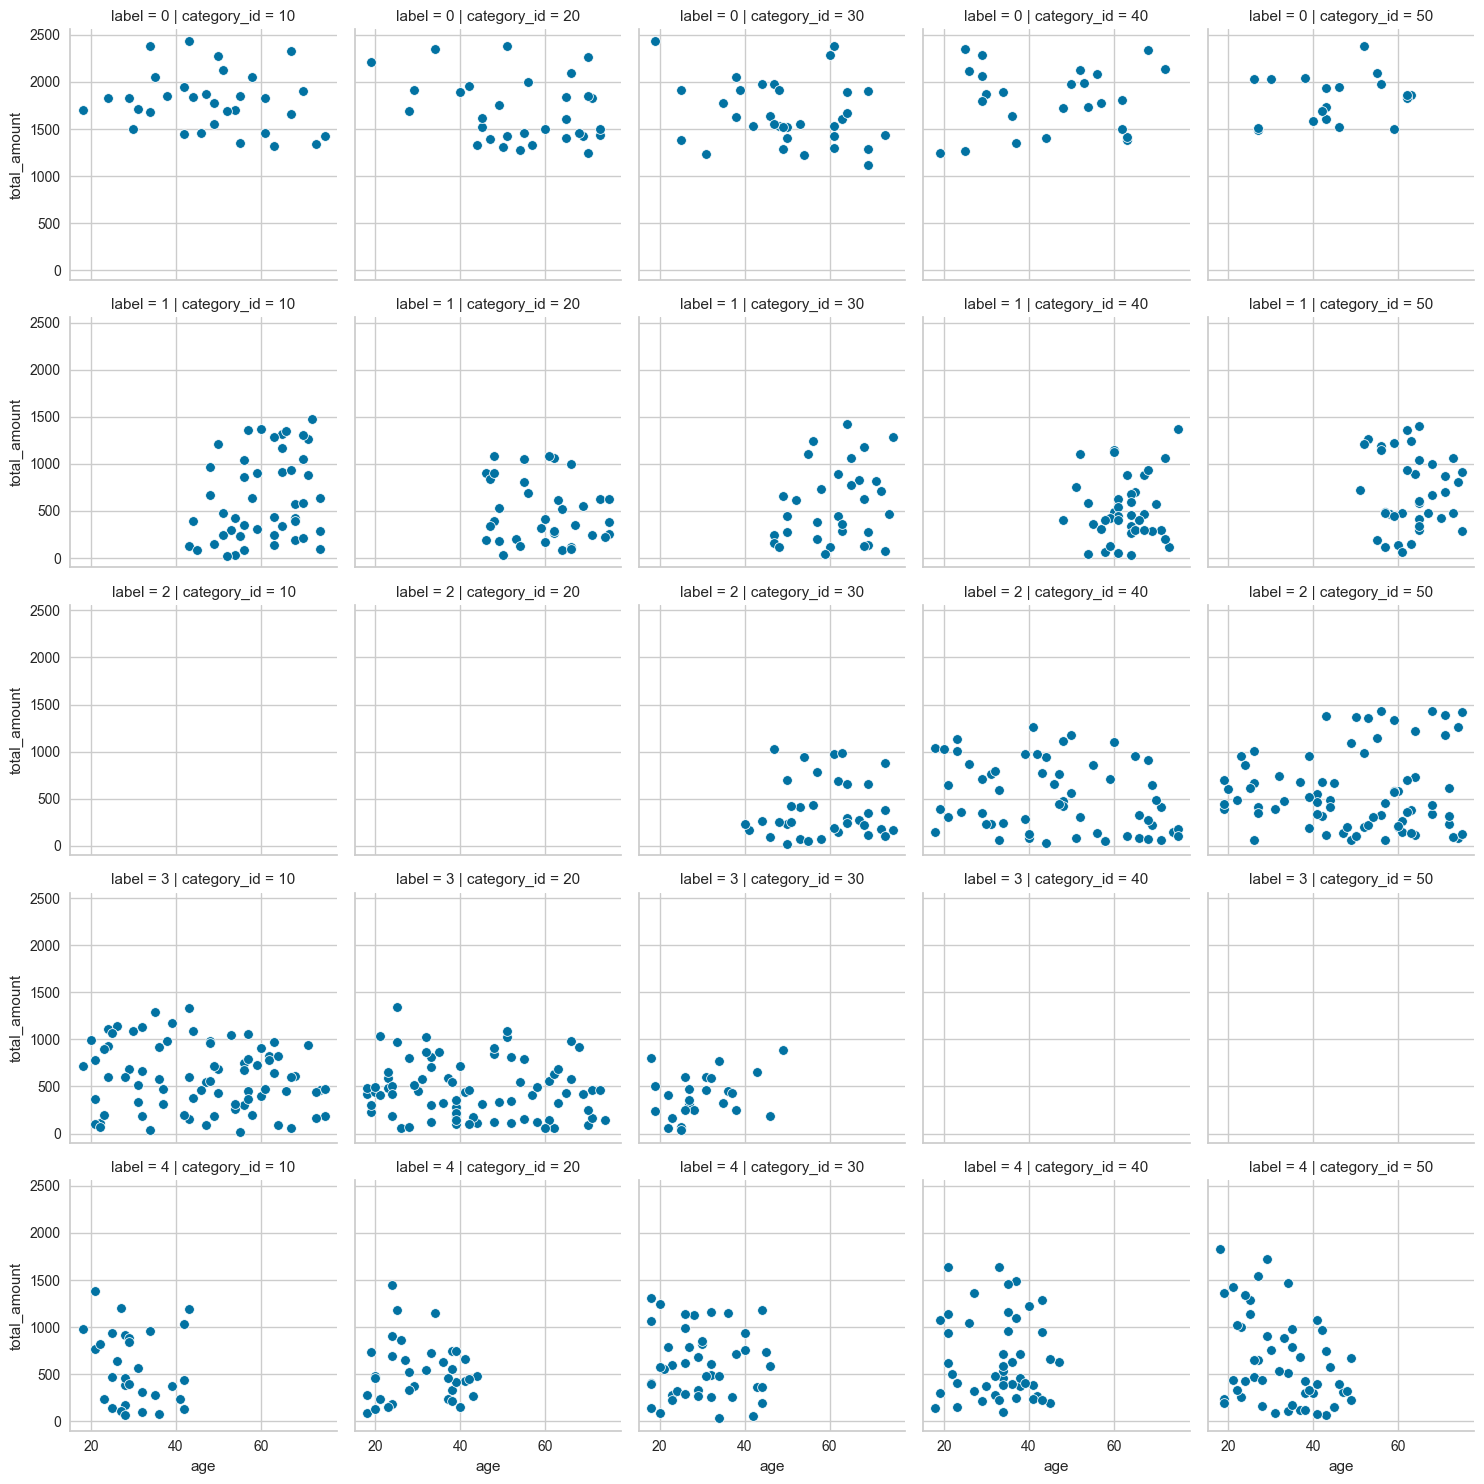

In [91]:
g = sns.FacetGrid(df, col="category_id", row='label')
g.map_dataframe(sns.scatterplot, x="age", y="total_amount")

### Clusters charateristics
- **cluster 0**: high spending 
- **cluster 1**: males, low spending, age>45 
- **cluster 2**: females, low spending, category_id = 40,50, (category id = 30 & age > 45)
- **cluster 3**: females, low spending, category_id = 10,20, (category id = 30 & age < 45)
- **cluster 4**: males, low spending, age<45